In [1]:
import matplotlib.pyplot as plt
import seaborn  as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("D:/code-ds/cuoi-ky/Book2.csv")

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [4]:
data.tail()

,carat,cut,color,clarity,depth,table,price
53935,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,0.72,Good,D,SI1,63.1,55.0,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,0.86,Premium,H,SI2,61.0,58.0,2757
53939,0.75,Ideal,D,SI2,62.2,55.0,2757


In [5]:
data.shape

(53940, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


In [7]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'], dtype='object')

In [8]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [9]:
data.describe()

,carat,depth,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722
std,0.474011,1.432621,2.234491,3989.439738
min,0.200000,43.000000,43.000000,326.000000
25%,0.400000,61.000000,56.000000,950.000000
50%,0.700000,61.800000,57.000000,2401.000000
75%,1.040000,62.500000,59.000000,5324.250000
max,5.010000,79.000000,95.000000,18823.000000


In [10]:
bl_col = data.select_dtypes(include=('boolean')).columns
int_col = data.select_dtypes(include=('int')).columns
str_col = data.select_dtypes(include=('object')).columns
flt_col = data.select_dtypes(include=('float')).columns

In [11]:
print("Boolean Columns", bl_col)
print("Integer Columns", int_col)
print("String Columns", str_col)
print("Float Columns", flt_col)

Boolean Columns Index([], dtype='object')
Integer Columns Index(['price'], dtype='object')
String Columns Index(['cut', 'color', 'clarity'], dtype='object')
Float Columns Index(['carat', 'depth', 'table'], dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

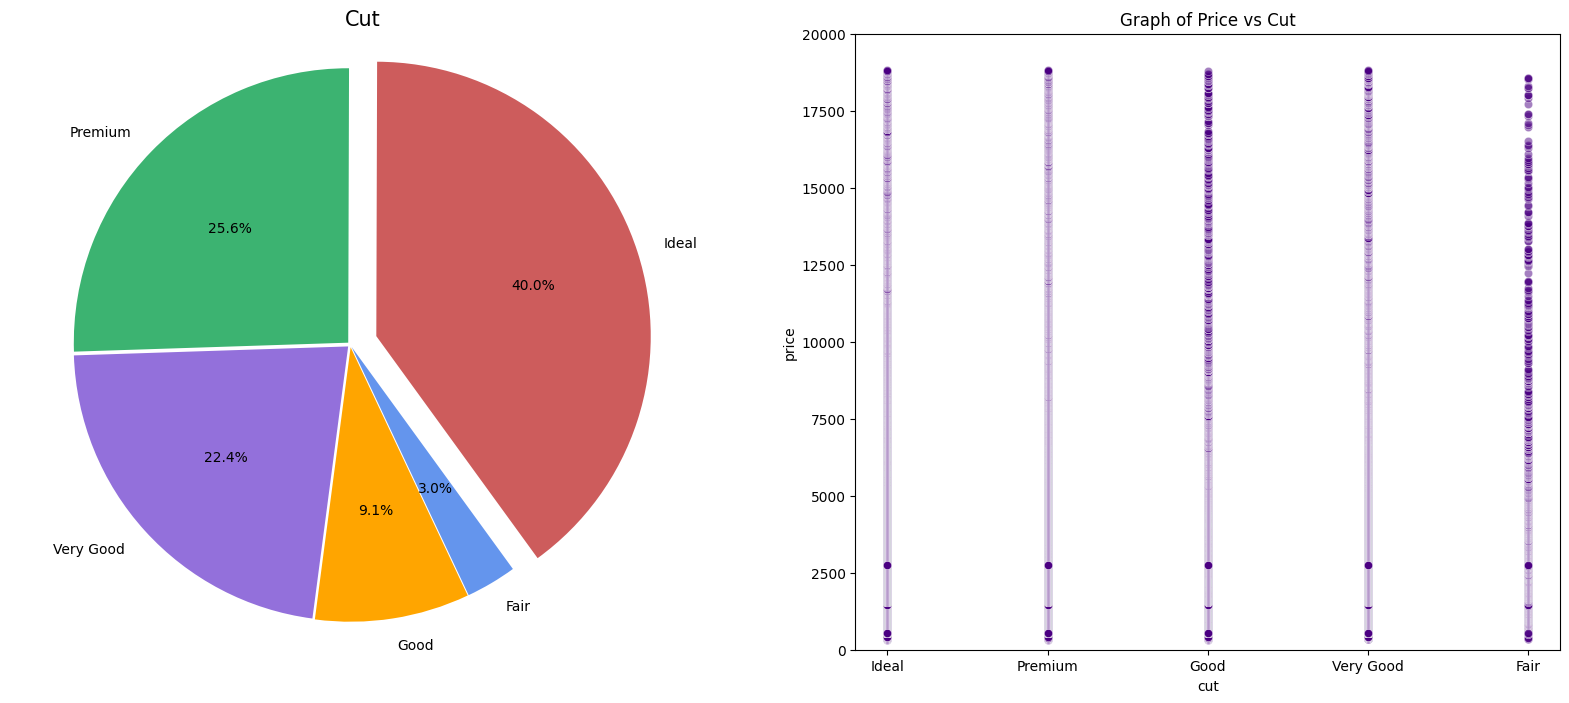

In [12]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
plt.pie(data['cut'].value_counts().values, labels=data['cut'].value_counts().index,autopct='%1.1f%%',startangle=-54,colors=('indianred','mediumseagreen','mediumpurple','orange','cornflowerblue'),explode=(0.1,0.01,0.01,0.01,0.01))
plt.title('Cut', fontsize=15)
plt.axis("equal")

plt.subplot(1,2,2)
plt.ylim(0,20000)
sns.scatterplot(data, x='cut',y='price',alpha=0.5,color='indigo')
plt.title("Graph of Price vs Cut")

plt.show

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\2877455601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['color'].value_counts().values, x=data['color'].value_counts().index,palette='magma')


<function matplotlib.pyplot.show(close=None, block=None)>

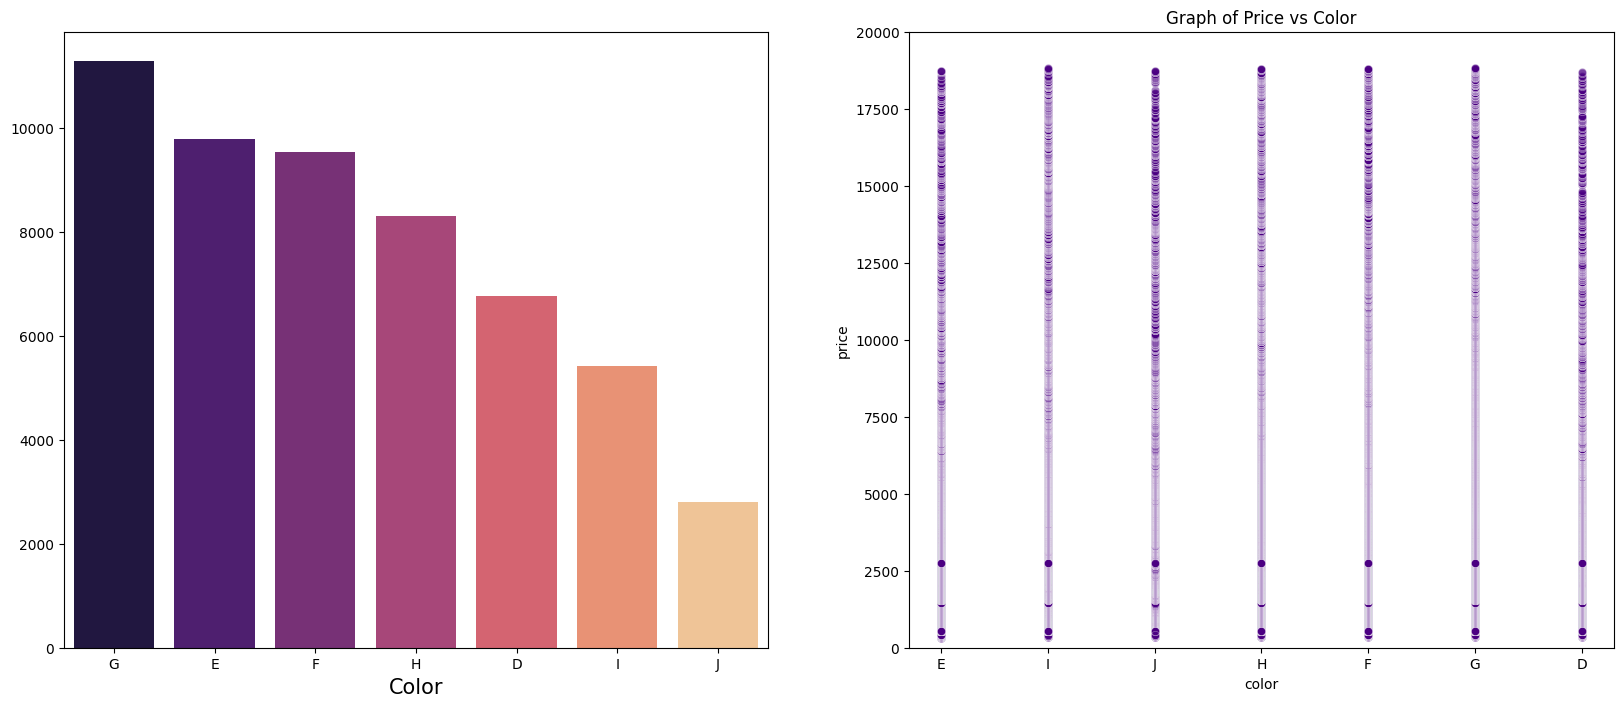

In [13]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sns.barplot(y=data['color'].value_counts().values, x=data['color'].value_counts().index,palette='magma')
plt.xlabel('Color', fontsize=15)

plt.subplot(1,2,2)
plt.ylim(0,20000)
sns.scatterplot(data, x='color',y='price',alpha=0.5,color='indigo')
plt.title("Graph of Price vs Color")

plt.show

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\2933946310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['clarity'].value_counts().values, x=data['clarity'].value_counts().index,palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

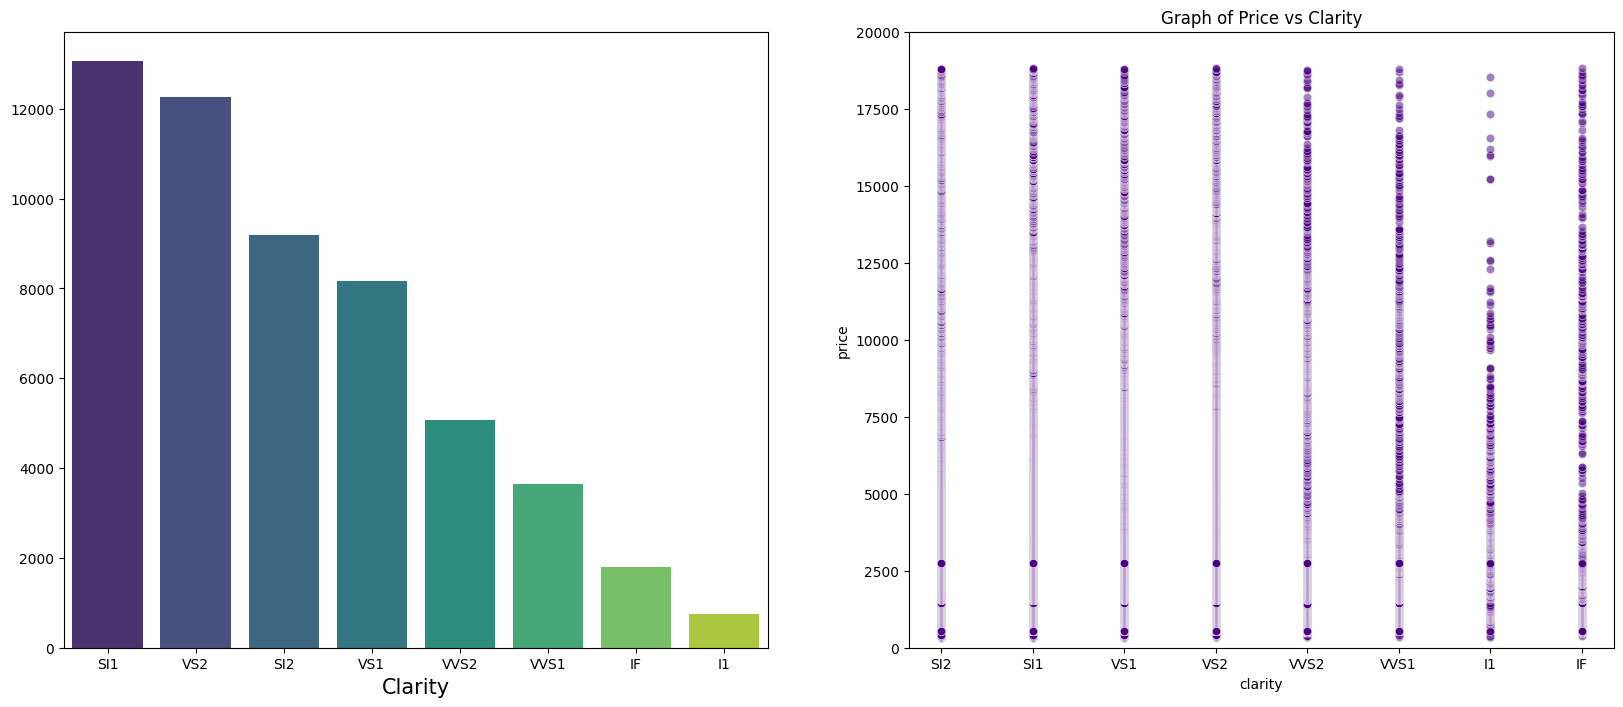

In [14]:
plt.figure(figsize=(20, 8))

plt.subplot(1,2,1)
sns.barplot(y=data['clarity'].value_counts().values, x=data['clarity'].value_counts().index,palette='viridis')
plt.xlabel('Clarity', fontsize=15)

plt.subplot(1,2,2)
plt.ylim(0,20000)
sns.scatterplot(data, x='clarity',y='price',alpha=0.5,color='indigo')
plt.title("Graph of Price vs Clarity")

plt.show

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\1365168567.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.carat,color='maroon',bins=20)


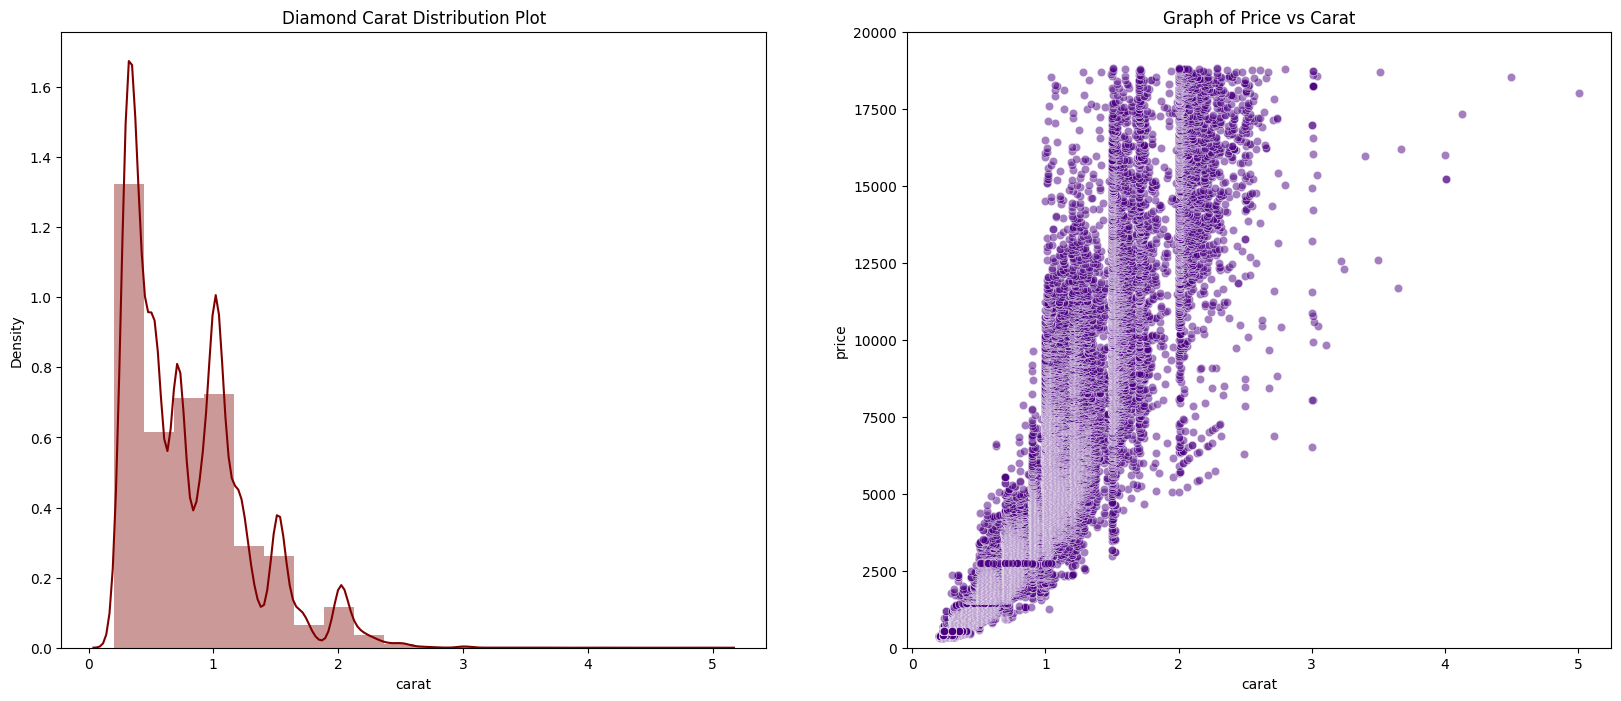

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Diamond Carat Distribution Plot')
sns.distplot(data.carat,color='maroon',bins=20)

plt.subplot(1,2,2)
plt.title('Graph of Price vs Carat')
plt.ylim(0,20000)
sns.scatterplot(data, x='carat',y='price',alpha=0.5,color='indigo')

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\540863313.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.table,color='royalblue',bins=20)


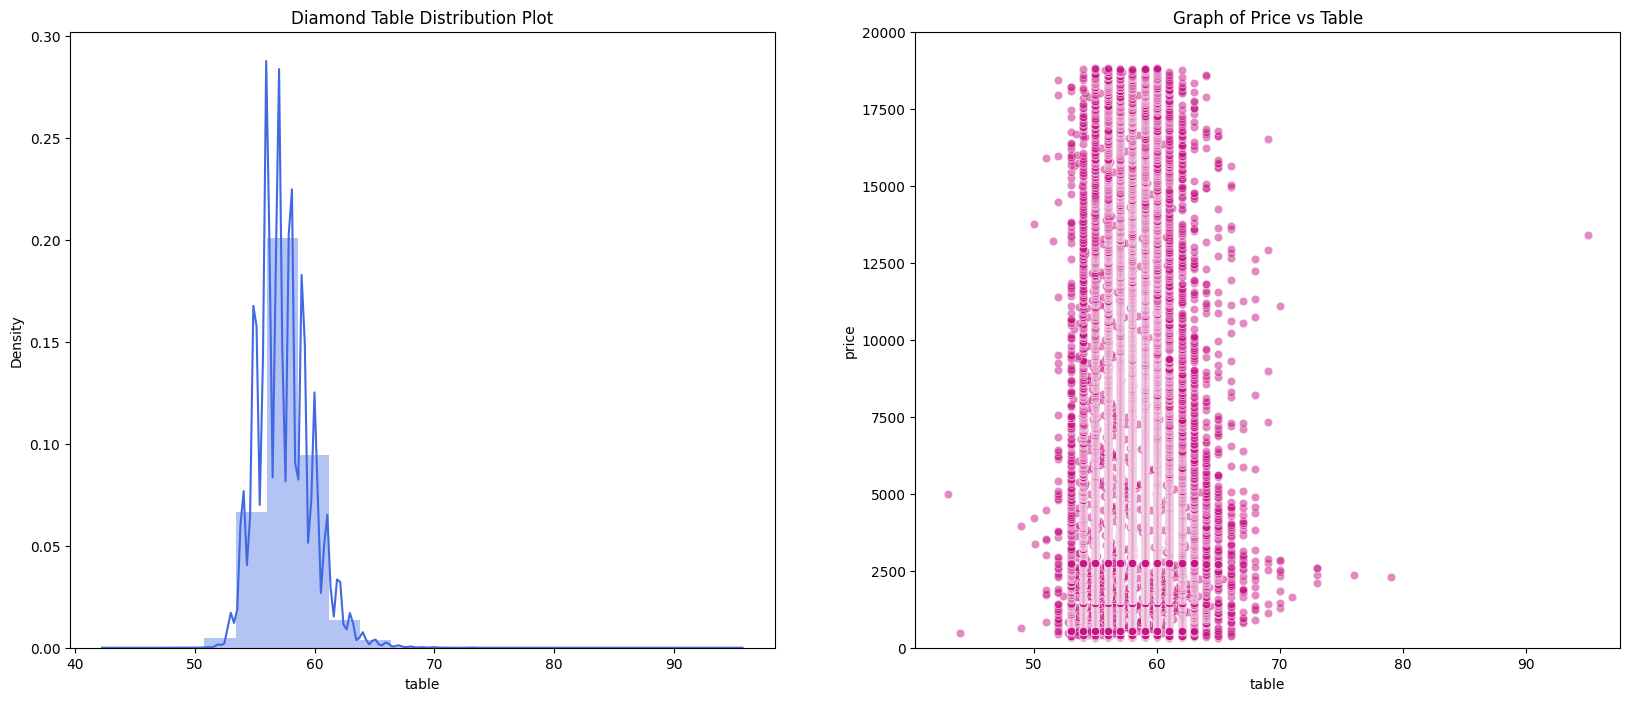

In [16]:
#numeric variables 2
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Diamond Table Distribution Plot')
sns.distplot(data.table,color='royalblue',bins=20)

plt.subplot(1,2,2)
plt.title('Graph of Price vs Table')
plt.ylim(0,20000)
sns.scatterplot(data, x='table',y='price',alpha=0.5,color='mediumvioletred')

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10232\4180428893.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.depth,color='orangered',bins=20)


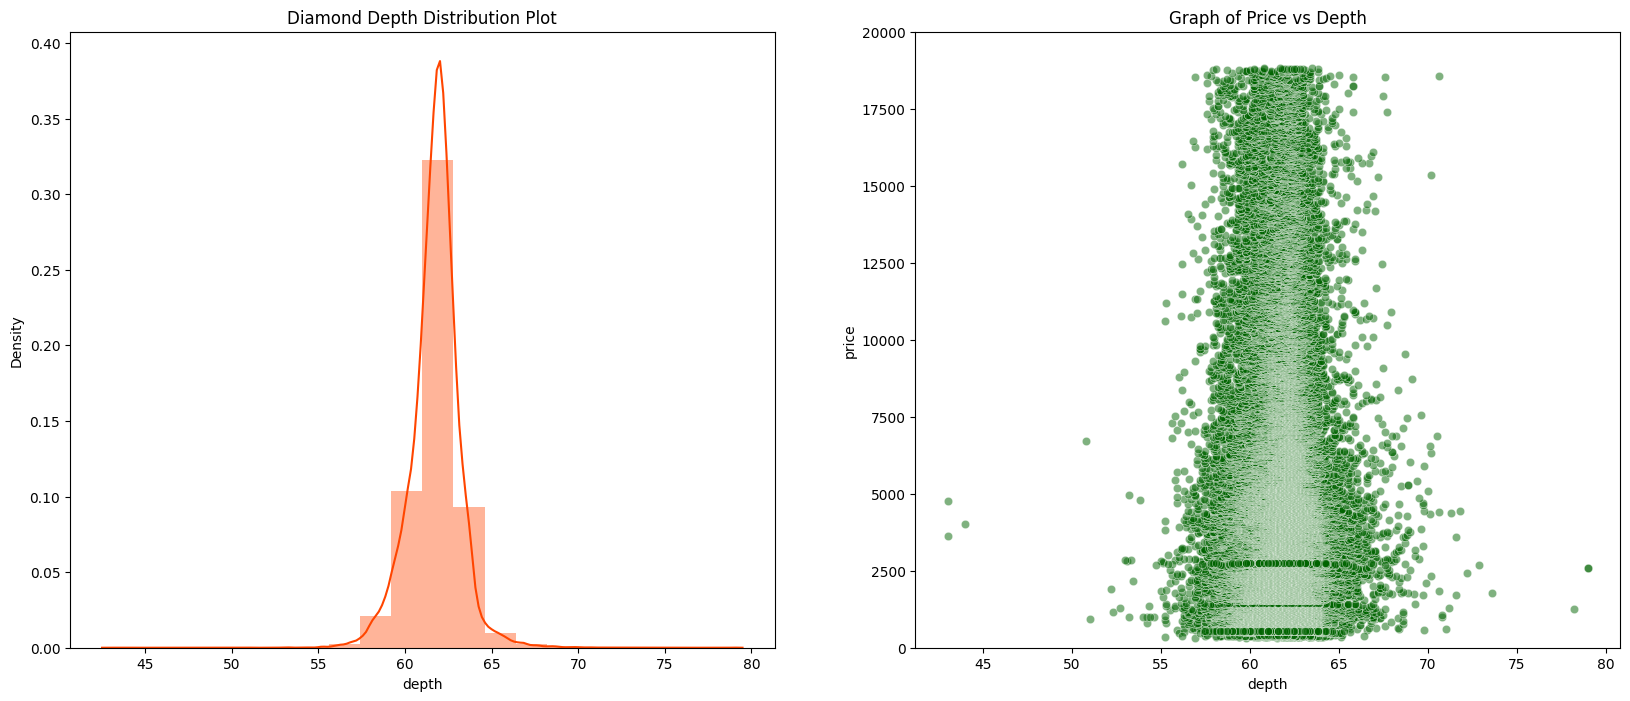

In [17]:
#numeric variables 3
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Diamond Depth Distribution Plot')
sns.distplot(data.depth,color='orangered',bins=20)

plt.subplot(1,2,2)
plt.title('Graph of Price vs Depth')
plt.ylim(0,20000)
sns.scatterplot(data, x='depth',y='price',alpha=0.5,color='darkgreen')

plt.show()


In [18]:
numerical_data = data.select_dtypes(include=[float, int])

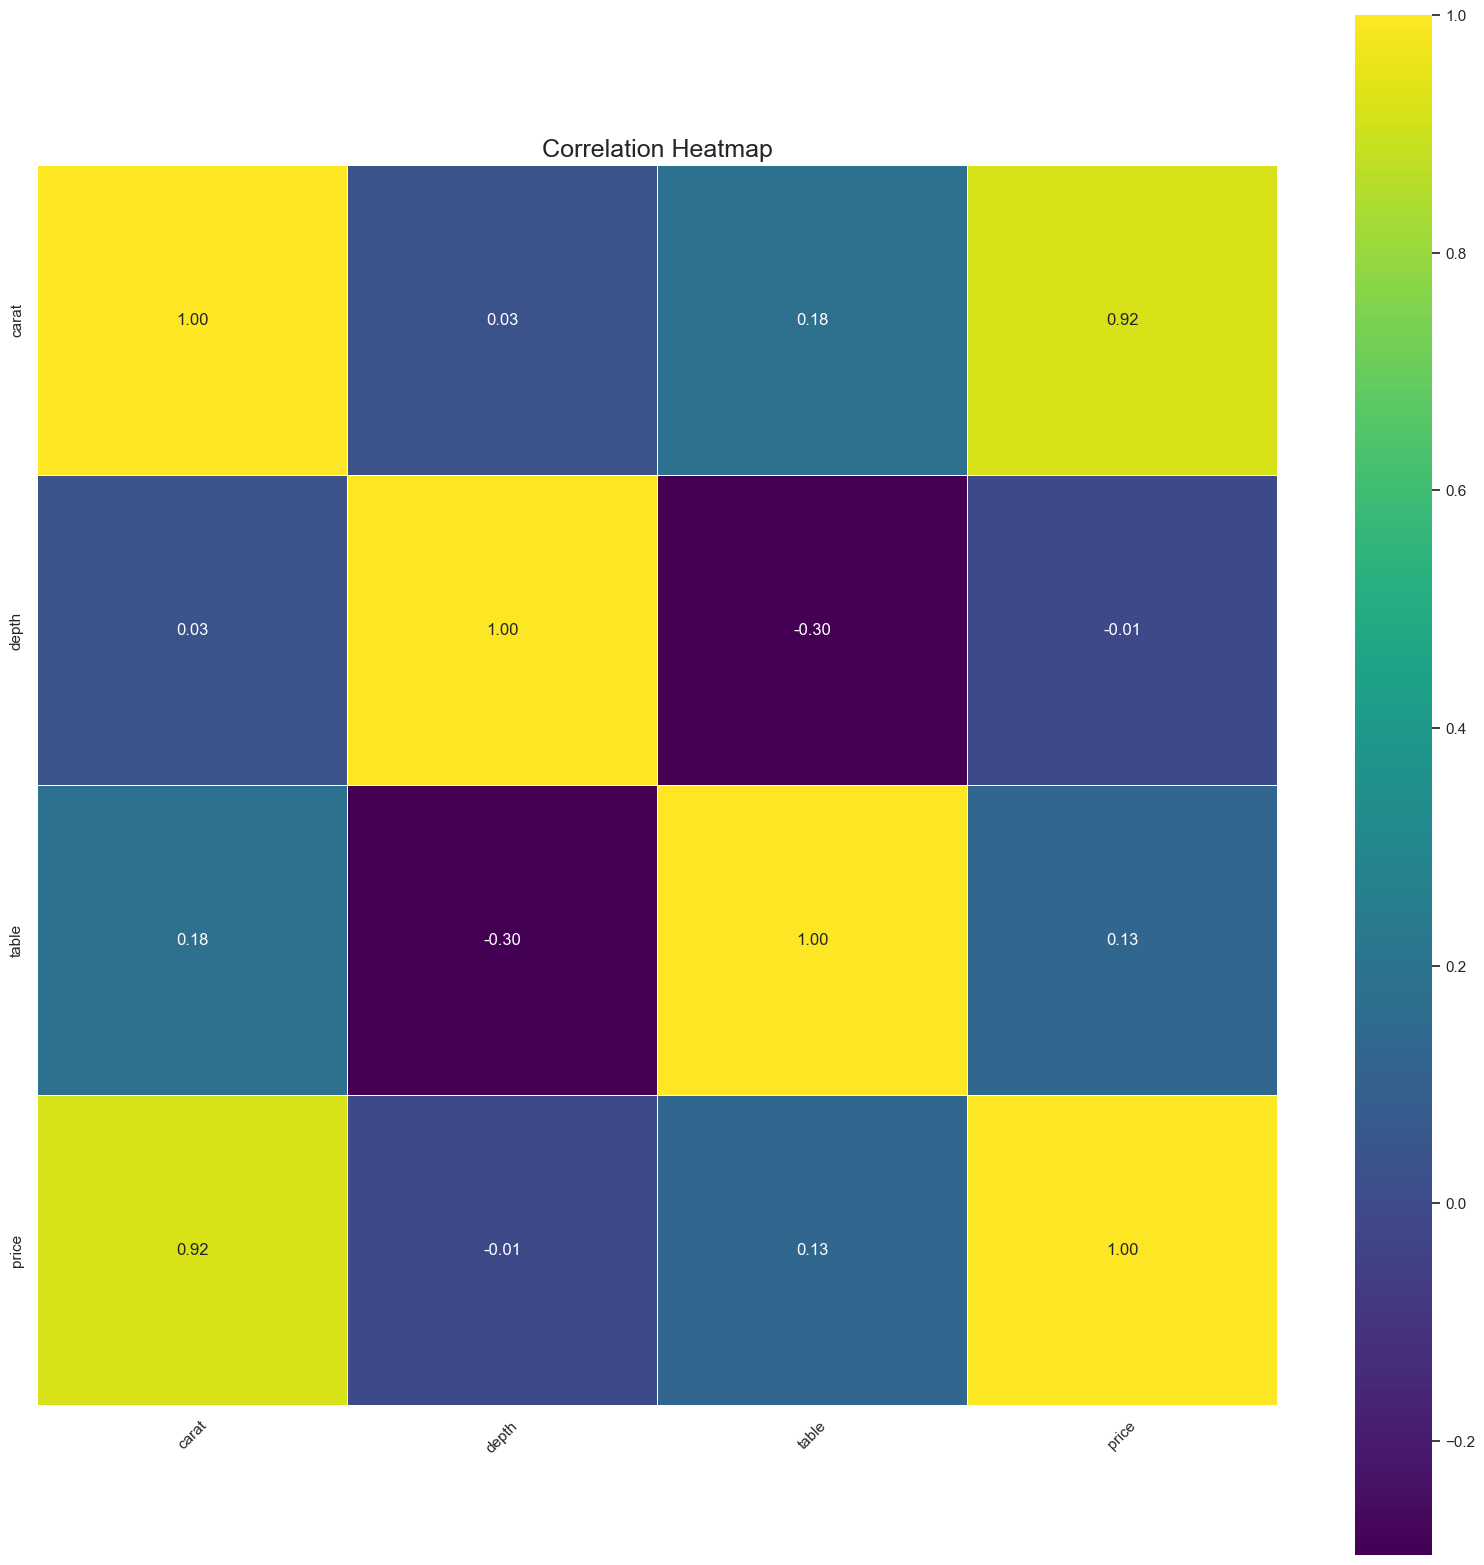

In [19]:
plt.figure(figsize=(20, 20))

# Create a correlation matrix
correlation_matrix = numerical_data.corr()

# Adjust font size
sns.set(font_scale=1) 

# Set background style
sns.set_style("whitegrid") 

# Create the heatmap without the index column
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, square=True)

# Set title 
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [20]:
data["cut"] = data["cut"].replace({"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5})
data["clarity"] = data["clarity"].replace({'IF':8, 'VVS1':7, 'VVS2':6, 'VS1':5, 'VS2':4, 'SI1':3, 'SI2':2, 'I1':1})
data["color"]=data["color"].replace({'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1})
print(data)

       carat  cut  color  clarity  depth  table  price
0       0.23    5      6        2   61.5   55.0    326
1       0.21    4      6        3   59.8   61.0    326
2       0.23    2      6        5   56.9   65.0    327
3       0.29    4      2        4   62.4   58.0    334
4       0.31    2      1        2   63.3   58.0    335
...      ...  ...    ...      ...    ...    ...    ...
53935   0.72    5      7        3   60.8   57.0   2757
53936   0.72    2      7        3   63.1   55.0   2757
53937   0.70    3      7        3   62.8   60.0   2757
53938   0.86    4      3        2   61.0   58.0   2757
53939   0.75    5      7        2   62.2   55.0   2757

[53940 rows x 7 columns]


In [21]:
x_data = data.drop('price', axis=True)
x_data.head()

,carat,cut,color,clarity,depth,table
0,0.23,5,6,2,61.5,55.0
1,0.21,4,6,3,59.8,61.0
2,0.23,2,6,5,56.9,65.0
3,0.29,4,2,4,62.4,58.0
4,0.31,2,1,2,63.3,58.0


In [22]:
y_data = data['price']
y_data.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

Random Forest Regressor

In [23]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_data, y_data,test_size=0.3, random_state=42)

In [24]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [25]:
# Train the model
rf_regressor.fit(x_train_rf, y_train_rf)

RandomForestRegressor(random_state=42)

In [26]:
# Predict on the test set
y_pred_rf = rf_regressor.predict(x_test_rf)

In [48]:
results1 = pd.DataFrame({'Actual': y_test_rf, 'Predicted': y_pred_rf, 'Residuals': y_pred_rf-y_test_rf})
print(results1)

       Actual     Predicted    Residuals
1388      559    558.770000    -0.230000
50052    2201   2348.850000   147.850000
41645    1238   1150.153333   -87.846667
42377    1304   1145.892833  -158.107167
17244    6901  10443.423000  3542.423000
...       ...           ...          ...
29577     705    893.456667   188.456667
12564    5278   4678.004500  -599.995500
24786   13157  12649.976571  -507.023429
1332     2960   3197.500000   237.500000
42527    1323   1292.342500   -30.657500

[16182 rows x 3 columns]


In [49]:
comparison_stats1 = {
    'Mean Predicted': results1['Predicted'].mean(),
    'Mean Residuals': results1['Residuals'].mean(),
    'Std Dev Residuals': results1['Residuals'].std(),
    'Max Residual': results1['Residuals'].max(),
    'Min Residual': results1['Residuals'].min()
}
print(comparison_stats1)

{'Mean Predicted': 3896.1557071558113, 'Mean Residuals': 6.979029365673932, 'Std Dev Residuals': 548.0892105740095, 'Max Residual': 5941.779999999999, 'Min Residual': -6422.42}


In [29]:
#Calculating the R-squared, MSE score
r2_rf = r2_score(y_test_rf, y_pred_rf)
MSE_rf = mean_squared_error(y_test_rf, y_pred_rf)

# Output the R-squared score, MSE
print('R-squared score:', r2_rf)
print('MSE score:', MSE_rf)

R-squared score: 0.9807365586353177
MSE score: 300431.9256519979


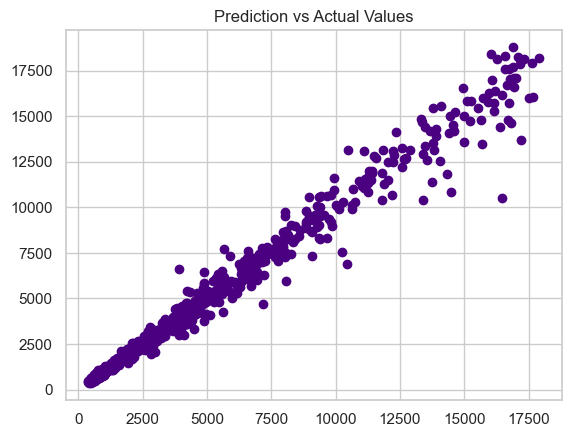

In [30]:
plt.title('Prediction vs Actual Values')
plt.scatter(y_pred_rf[:1000], y_test_rf[:1000], color = 'indigo')

Linear Regression

In [31]:
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(x_data, y_data,test_size=0.3, random_state=42)

In [32]:
lin_model = LinearRegression()

In [33]:
lin_model.fit(x_train_lin, y_train_lin)

LinearRegression()

In [34]:
# Predict on the test set
y_pred_lin = lin_model.predict(x_test_lin)

In [50]:
results2 = pd.DataFrame({'Actual': y_test_lin, 'Predicted': y_pred_lin, 'Residuals': y_pred_lin-y_test_lin})
print(results2)

       Actual     Predicted    Residuals
1388      559    597.000396    38.000396
50052    2201   3206.676093  1005.676093
41645    1238   2147.740931   909.740931
42377    1304   2292.835460   988.835460
17244    6901  10164.777075  3263.777075
...       ...           ...          ...
29577     705    476.083752  -228.916248
12564    5278   5387.757549   109.757549
24786   13157  10028.430065 -3128.569935
1332     2960   4168.561421  1208.561421
42527    1323   2385.330191  1062.330191

[16182 rows x 3 columns]


In [51]:
comparison_stats2 = {
    'Mean Predicted': results2['Predicted'].mean(),
    'Mean Residuals': results2['Residuals'].mean(),
    'Std Dev Residuals': results2['Residuals'].std(),
    'Max Residual': results2['Residuals'].max(),
    'Min Residual': results2['Residuals'].min()
}
print(comparison_stats2)

{'Mean Predicted': 3899.368807556576, 'Mean Residuals': 10.192129766438885, 'Std Dev Residuals': 1220.0378273019903, 'Max Residual': 14556.858978724427, 'Min Residual': -8840.416402326102}


In [36]:
#Calculating the R-squared, MSE score
r2_lin = r2_score(y_test_lin, y_pred_lin)
MSE_lin = mean_squared_error(y_test_lin, y_pred_lin)

# Output the R-squared score, MSE
print('R-squared score:', r2_lin)
print('MSE score:', MSE_lin)

R-squared score: 0.9045583680183741
MSE score: 1488504.1951112535


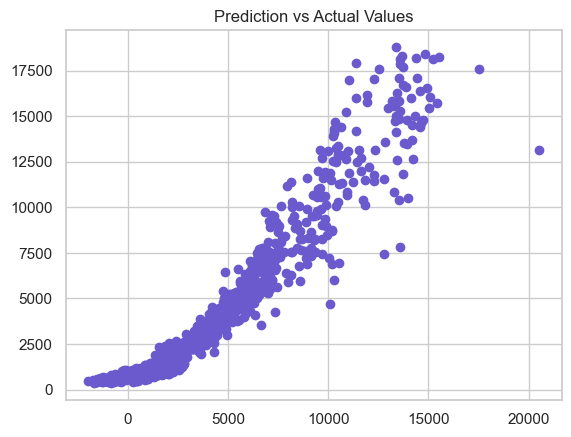

In [37]:
plt.title('Prediction vs Actual Values')
plt.scatter(y_pred_lin[:1000], y_test_lin[:1000], color = 'slateblue')

XGBoost

In [38]:
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(x_data, y_data,test_size=0.3, random_state=42)

In [39]:
XGB_model = xgb.XGBRegressor()

In [40]:
XGB_model.fit(x_train_xgb, y_train_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
# Predict on the test set
y_pred_xgb = XGB_model.predict(x_test_xgb)

In [52]:
results3 = pd.DataFrame({'Actual': y_test_xgb, 'Predicted': y_pred_xgb, 'Residuals': y_pred_xgb-y_test_xgb})
print(results3)

       Actual     Predicted    Residuals
1388      559    533.723206   -25.276794
50052    2201   2330.537354   129.537354
41645    1238   1176.305176   -61.694824
42377    1304   1265.334106   -38.665894
17244    6901   9638.104492  2737.104492
...       ...           ...          ...
29577     705    884.828735   179.828735
12564    5278   5178.318359   -99.681641
24786   13157  12740.011719  -416.988281
1332     2960   3265.279053   305.279053
42527    1323   1296.569336   -26.430664

[16182 rows x 3 columns]


In [54]:
comparison_stats3 = {
    'Mean Actual': results3['Actual'].mean(),
    'Mean Predicted': results3['Predicted'].mean(),
    'Mean Residuals': results3['Residuals'].mean(),
    'Std Dev Residuals': results3['Residuals'].std(),
    'Max Residual': results3['Residuals'].max(),
    'Min Residual': results3['Residuals'].min()
}
print(comparison_stats3)

{'Mean Actual': 3889.176677790137, 'Mean Predicted': 3889.7214, 'Mean Residuals': 0.5448937110207812, 'Std Dev Residuals': 550.6172445568321, 'Max Residual': 7308.1259765625, 'Min Residual': -6427.2578125}


In [43]:
#Calculating the R-squared, MSE score
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)
MSE_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)

# Output the R-squared score, MSE
print('R-squared score:', r2_xgb)
print('MSE score:', MSE_xgb)

R-squared score: 0.9805615783788216
MSE score: 303160.9113204985


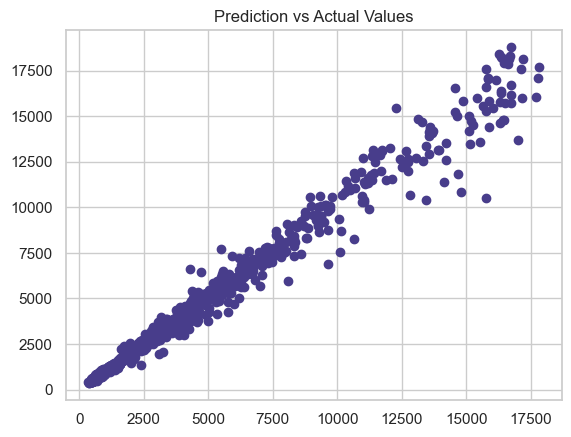

In [44]:
plt.title('Prediction vs Actual Values')
plt.scatter(y_pred_xgb[:1000], y_test_xgb[:1000], color = 'darkslateblue')

In [45]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to display feature names and their importance scores
features_df = pd.DataFrame({'Feature': x_data.columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
sorted_features_df = features_df.sort_values(by='Importance', ascending=False)

# Output the sorted DataFrame
print(sorted_features_df.head())

   Feature  Importance
0    carat    0.885037
3  clarity    0.067233
2    color    0.032956
4    depth    0.007877
5    table    0.003806
